In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('weight-height.csv')
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0.5, 1.0, ' Weightvs Height ')

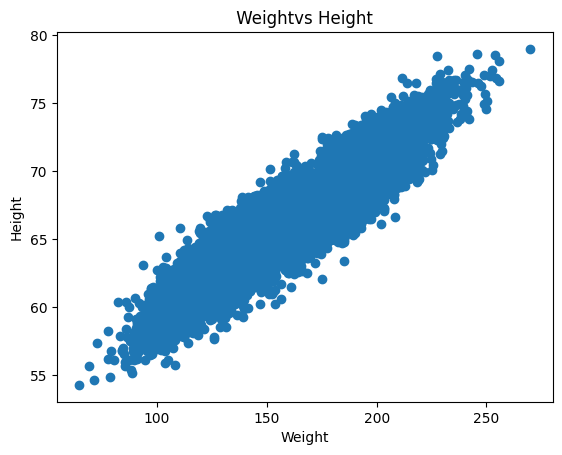

In [3]:


#scatter plot
plt.scatter(dataset['Weight'],dataset['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title(' Weightvs Height ')


In [6]:
dataset.drop('Gender',axis=1,inplace=True)

dataset

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [7]:
dataset.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


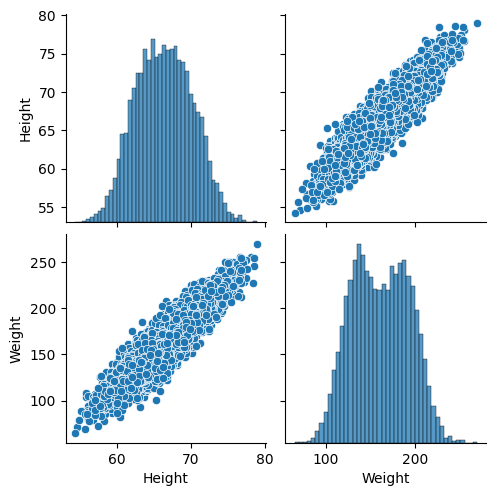

In [8]:
#visual with seaborn

sns.pairplot(dataset)

**We can say that Simple liner Regression will work perfect because the co relation between Height and weight is 1.or positive co relation**

In [ ]:
## Independent and dependent features
X=dataset[['Weight']] #make sure X is in 2D array or a Dtaframe
np.array(X).shape
y=dataset['Height'] #this is a series or 1D array




In [12]:
# Train Test Split

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [13]:
X_train.shape

(7000, 1)

In [14]:
## Standardization


from sklearn.preprocessing import StandardScaler 




In [15]:
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)


array([[ 1.75479368],
       [ 0.48689671],
       [ 1.74620657],
       ...,
       [-1.33891093],
       [ 1.01499591],
       [ 1.4250004 ]])

In [16]:
X_test=scaler.transform(X_test)

In [17]:
X_test

array([[ 0.06727764],
       [-0.61494306],
       [-0.43942532],
       ...,
       [-1.59106808],
       [-1.09306725],
       [-0.42048708]])

In [18]:
## Model Building

from sklearn.linear_model import LinearRegression

lm=LinearRegression(n_jobs=-1)
lm.fit(X_train,y_train)
print("Cofficient or slope:",lm.coef_)
print("Intercept:",lm.intercept_)



Cofficient or slope: [0.11050604]
Intercept: 48.53298908025391


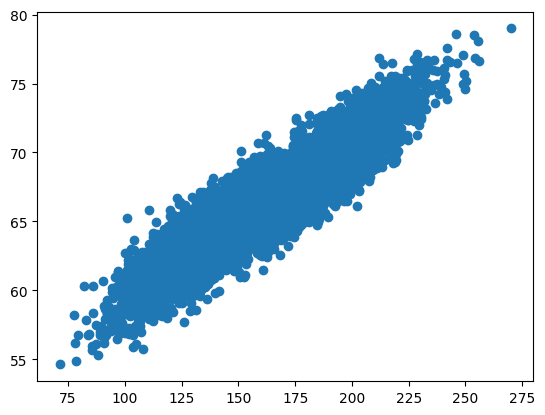

In [19]:
##plotting the regression line
plt.scatter(X_train,y_train)


Text(0.5, 1.0, ' Weight vs Height ')

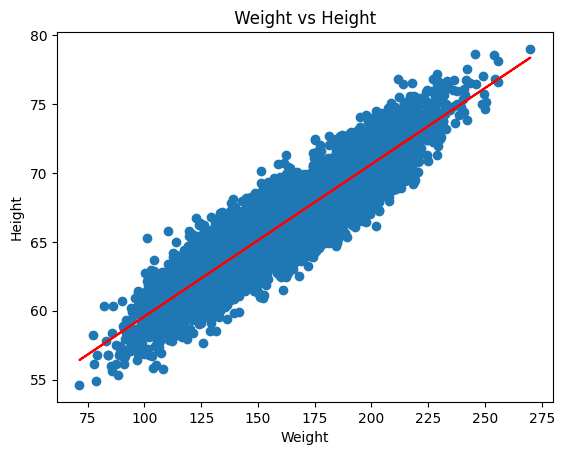

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lm.predict(X_train),color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title(' Weight vs Height ')

In [26]:
## Prediction
y_pred=lm.predict(X_test)
print(y_pred)

[48.54042367 48.46503416 48.48442993 ... 48.35716645 48.41219855
 48.48652272]


/home/swadhin/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))


MAE: 17.814044529334137
MSE: 331.48878361027306
RMSE: 18.206833431716593
R2 Score: -21.20909476822422


In [30]:
### OLS Method
import statsmodels.api as sm


In [31]:
model=sm.OLS(y_train,X_train).fit()

In [32]:
preduction=model.predict(X_test)
print(preduction)

[ 0.02688632 -0.24575114 -0.17560858 ... -0.63584228 -0.43682504
 -0.16804024]


In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          3.300e+05
Date:                Thu, 11 Jul 2024   Prob (F-statistic):                        0.00
Time:                        21:04:28   Log-Likelihood:                         -25752.
No. Observations:                7000   AIC:                                  5.151e+04
Df Residuals:                    6999   BIC:                                  5.151e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
### Prediction for new data

lm.predict(scaler.transform([[160]]))

/home/swadhin/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/swadhin/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([48.52792851])